In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
%matplotlib inline

## From Nixon & King 2012
### $\partial_t\vec{L} =\,...$

### term 1: $...\,\frac{1}{r}\partial_r\left\{\frac{\partial_r\left[\nu_1\Sigma r^3(-\Omega')\right]}{\Sigma\partial_r(r^2\Omega)}\vec{L}\right\} = \frac{3}{r}\partial_r\left\{\frac{r}{|\vec{L}|}\partial_r\left[\nu_1|\vec{L}|\right]\vec{L}\right\}$

### term 2: $...\,+\,\frac{1}{r}\partial_r\left[\frac{1}{2}\nu_2r|\vec{L}|\partial_r\vec{l}\right]$

### term 3: $...\,+\,\frac{1}{r}\partial_r\left\{\left[\frac{\frac{1}{2}\nu_2r^3\Omega|\partial_r\vec{l}|^2}{\partial_r(r^2\Omega)} + \nu_1(\frac{r\Omega'}{\Omega})\right]\vec{L}\right\} = \frac{1}{r}\partial_r\left\{\left[\nu_2r^2(\partial_r\vec{l})^2 - \frac{3}{2}\nu_1\right]\vec{L}\right\}$

### term 4: $...\,+\,\frac{1}{r}\partial_r\left\{\nu_3r\vec{L}\times\partial_r\vec{l}\right\}$

### term 5: $...\,+\,\vec{\Omega}_p\times\vec{L}$

### And now we want to discretize this, so for convenience, lets just try it term by term....

### $\vec{L}^{n+1}_i = \vec{L}^n_i + \Delta t(\vec{f}_{1,i} + \vec{f}_{2,i} + \vec{f}_{3,i} + \vec{f}_{4,i} + \vec{f}_{5,i})$

### $\vec{f}_{1,i} \approx \frac{3}{4r_i}\frac{1}{\Delta r^2}\left[(r_{i+1} + r_{i})(\vec{l}_{i+1} + \vec{l}_{i})\left(\nu_{1,i+1}|\vec{L}|_{i+1} - \nu_{1,i}|\vec{L}|_{i}\right) - (r_{i} + r_{i-1})(\vec{l}_{i} + \vec{l}_{i-1})\left(\nu_{1,i}|\vec{L}|_{i} - \nu_{1,i-1}|\vec{L}|_{i-1}\right)\right]$

### $\vec{f}_{2,i} \approx \frac{1}{16r_i}\frac{1}{\Delta r^2}\left[(\nu_{2,i+1}+\nu_{2,i})(r_{i+1} + r_{i})(|\vec{L}|_{i+1} + |\vec{L}|_{i})(\vec{l}_{i+1} - \vec{l}_{i}) - (\nu_{2,i}+\nu_{2,i-1})(r_{i} + r_{i-1})(|\vec{L}|_{i} + |\vec{L}|_{i-1})(\vec{l}_{i} - \vec{l}_{i-1})\right]$

### $\vec{f}_{3,i} \approx \frac{1}{8r_i}\frac{1}{\Delta r^3}\left\{\left[\frac{1}{2}(\nu_{2,i+1} + \nu_{2,i})(r_{i+1} + r_{i})^2(\vec{l}_{i+1}-\vec{l}_{i})^2 - 3(\nu_{1,i+1}+\nu_{1,i})\right](\vec{L}_{i+1}+\vec{L}_{i}) - \left[\frac{1}{2}(\nu_{2,i} + \nu_{2,i-1})(r_{i} + r_{i-1})^2(\vec{l}_{i}-\vec{l}_{i-1})^2 - 3(\nu_{1,i}+\nu_{1,i-1})\right](\vec{L}_{i}+\vec{L}_{i-1})\right\}$

### We will write $\vec{f}_{4,i}$ in terms of its $x$, $y$ and $z$ components because of the cross product

### $(\vec{f}_{4,i})_x \approx \frac{1}{8r_i}\frac{1}{\Delta r_i^2}\left\{(\nu_{3,i+1}+\nu_{3,i})(r_{i+1}+r_{i})\left[(\vec{L}_{i+1}+\vec{L}_{i})_y(\vec{l}_{i+1}-\vec{l}_{i})_z - (\vec{L}_{i+1}+\vec{L}_{i})_z(\vec{l}_{i+1}-\vec{l}_{i})_y\right] - (\nu_{3,i}+\nu_{3,i-1})(r_{i}+r_{i-1})\left[(\vec{L}_{i}+\vec{L}_{i-1})_y(\vec{l}_{i}-\vec{l}_{i-1})_z - (\vec{L}_{i}+\vec{L}_{i-1})_z(\vec{l}_{i}-\vec{l}_{i-1})_y\right]\right\}$

### $(\vec{f}_{4,i})_y \approx \frac{1}{8r_i}\frac{1}{\Delta r_i^2}\left\{(\nu_{3,i+1}+\nu_{3,i})(r_{i+1}+r_{i})\left[(\vec{L}_{i+1}+\vec{L}_{i})_z(\vec{l}_{i+1}-\vec{l}_{i})_x - (\vec{L}_{i+1}+\vec{L}_{i})_x(\vec{l}_{i+1}-\vec{l}_{i})_z\right] - (\nu_{3,i}+\nu_{3,i-1})(r_{i}+r_{i-1})\left[(\vec{L}_{i}+\vec{L}_{i-1})_z(\vec{l}_{i}-\vec{l}_{i-1})_x - (\vec{L}_{i}+\vec{L}_{i-1})_x(\vec{l}_{i}-\vec{l}_{i-1})_z\right]\right\}$

### $(\vec{f}_{4,i})_z \approx \frac{1}{8r_i}\frac{1}{\Delta r_i^2}\left\{(\nu_{3,i+1}+\nu_{3,i})(r_{i+1}+r_{i})\left[(\vec{L}_{i+1}+\vec{L}_{i})_x(\vec{l}_{i+1}-\vec{l}_{i})_y - (\vec{L}_{i+1}+\vec{L}_{i})_y(\vec{l}_{i+1}-\vec{l}_{i})_x\right] - (\nu_{3,i}+\nu_{3,i-1})(r_{i}+r_{i-1})\left[(\vec{L}_{i}+\vec{L}_{i-1})_x(\vec{l}_{i}-\vec{l}_{i-1})_y - (\vec{L}_{i}+\vec{L}_{i-1})_y(\vec{l}_{i}-\vec{l}_{i-1})_x\right]\right\}$

### $\vec{f}_{5,i} = (\Omega_p)_i(-(\vec{L}_i)_{y}\hat{x} + (\vec{L}_i)_{x}\hat{y})$

### Lets declare global constants now

In [2]:
#########
## User Params

## Physics
H_R = 10**(-3.)#0.015
alpha = 0.2
gamma = 1.0
tilt = 10*(np.pi/180.0)
r0 = 3000.0 # mid point of density distribution
rw = 300.0  # width of density distribution
bhspin = 1.0
dolog = True

## Numerical
cfl = 0.5
tmax = 1 # max runtime of simulation; units of t_viscous
dt_init   = 1e-9  # initial timestep of simulation; units of t_viscous
rmin  = 60.0  # inner radius of disk
rmax  = 6000.0 # outer radius of disk
ngrid = 100 # number of grid points

In [20]:
# Build Q1, Q2, Q3 functions

def load_Q(path):
    data = open(path,"r")
    parsed = []
    for line in data:
        parsed.append(np.array(line.split()).astype(float))
    return np.array(parsed)[:,0]

Q1_path = "../tables/Q1_1d_a0.2_p0.0_g1.0_np30_ng10000.txt"
Q2_path = "../tables/Q2_1d_a0.2_p0.0_g1.0_np30_ng10000.txt"
Q3_path = "../tables/Q3_1d_a0.2_p0.0_g1.0_np30_ng10000.txt"
Q1_parsed = load_Q(Q1_path)
Q2_parsed = load_Q(Q2_path)
Q3_parsed = load_Q(Q3_path)

s_arr = np.logspace(0,np.log10(11),30) - 1
Q1_func = interp1d(s_arr,np.log10(-Q1_parsed + 1e-30),fill_value='extrapolate')
Q2_func = interp1d(s_arr,np.log10(Q2_parsed + 1e-30),fill_value='extrapolate')
Q3_func = interp1d(s_arr,np.log10(Q3_parsed + 1e-30),fill_value='extrapolate')

In [21]:
# ## Initializations
# radial quantities
if dolog:
    r = np.logspace(np.log10(rmin),np.log10(rmax),ngrid)
    dr = r[1:-1]*np.log(10)*(np.log10(r)[2:] - np.log10(r)[:-2])
else:
    r = np.linspace(rmin,rmax,ngrid)
    dr = r[2:] - r[:-2]

omega = r**(-3.0/2.0)
#density = np.sin(10.0*2.0*np.pi*radii/100.0) + 1.0
#density = np.ones(ngrid)
density = (1.0/(rw*np.sqrt(2.0*np.pi))) * np.exp(-0.5*((r - r0)/rw)**2.0)
density /= np.average(density)
amom_mag = density * omega * r**2.0

# generate radial profile of angular momentum vectors
amom_unit   = np.array([np.sin(tilt),0.0,np.cos(tilt)])
amom_uvector = np.array([amom_unit]*ngrid)
amom_vector = np.copy(amom_uvector)
for i in range(3): amom_vector[:,i] *= amom_mag
    
# for Lense-Thirring Precession
omega_p = np.zeros(3*ngrid)
omega_p = np.reshape(omega_p,(ngrid,3))
omega_p[:,2] = 2.0 * bhspin / r**3.0 # Black hole spin is in z direction

# calculate viscous time
nu_ref = (-2.0/3.0)*(-1.0*10**(Q1_func(0)))*((H_R**2.0)*r0**0.5)
t_viscous = r0*r0/nu_ref
tmax = tmax*t_viscous
dt_init = dt_init*t_viscous
print "tmax/t_viscous: ", tmax/t_viscous
print "dt_init/t_viscous: ", dt_init/t_viscous

tmax/t_viscous:  1.0
dt_init/t_viscous:  1e-09


In [22]:
def evolve():
    # Get initial timestep
    dt = np.copy(dt_init)
    
    # Initialize angular momentum array to initial condition
    L = np.copy(amom_vector)
    
    # Initialize arrays
    psi = np.zeros(len(L))
    Q1  = np.zeros(len(L))
    Q2  = np.zeros(len(L))
    Q3  = np.zeros(len(L))
    nu1 = np.zeros(len(L))
    nu2 = np.zeros(len(L))
    nu3 = np.zeros(len(L))
    prec_old = np.zeros(len(L))
    
    # Initialize time
    t = 0.0
        
    while (t < tmax):
        
        # initialize derivatives to zero at the beginning of every iteration
        dLxdt = np.zeros(len(L))
        dLydt = np.zeros(len(L))
        dLzdt = np.zeros(len(L))
                
        # we will evolve the cartesian components of the angular momentum vectors
        Lx = L[:,0]
        Ly = L[:,1]
        Lz = L[:,2]
        Lmag = np.sqrt(Lx**2.0 + Ly**2.0 + Lz**2.0)
        
        # now construct the components of the angular momentum unit vectors
        lx = Lx/Lmag
        ly = Ly/Lmag
        lz = Lz/Lmag
        l = np.array(zip(lx,ly,lz))
        
        # calculate warp parameter
        psi_x = (0.5*r[1:-1]/dr)*(l[2:,0]-l[:-2,0])
        psi_y = (0.5*r[1:-1]/dr)*(l[2:,1]-l[:-2,1])
        psi_z = (0.5*r[1:-1]/dr)*(l[2:,2]-l[:-2,2])
        psi[1:-1] = np.sqrt(psi_x**2.0 + psi_y**2.0 + psi_z**2.0)
        psi[0] = psi[1]
        psi[-1] = psi[-2]
        
        # calculate nu1,nu2,nu3
        nu1[1:-1] = (-2.0/3.0)*(-1.0*10**(Q1_func(psi[1:-1])))*((H_R**2.0)*r[1:-1]**0.5)
        nu1[0] = nu1[1]
        nu1[-1] = nu1[-2]

        nu2[1:-1] = 2.0*10**(Q2_func(psi[1:-1]))*((H_R**2.0)*r[1:-1]**0.5)
        nu2[0] = nu2[1]
        nu2[-1] = nu2[-2]

        nu3[1:-1] = 10**(Q3_func(psi[1:-1]))*((H_R**2.0)*r[1:-1]**0.5)
        nu3[0] = nu3[1]
        nu3[-1] = nu3[-2]

        #### Lets begin constructing the terms to evolve Lx, Ly, and Lz
        
        ## f1
        f1_x = (3.0/(4.0*r[1:-1]))*(1.0/dr**2.0)*((r[2:]+r[1:-1])*(l[2:,0]+l[1:-1,0])*(nu1[2:]*Lmag[2:]-nu1[1:-1]*Lmag[1:-1]) - (r[1:-1]+r[:-2])*(l[1:-1,0]+l[:-2,0])*(nu1[1:-1]*Lmag[1:-1]-nu1[:-2]*Lmag[:-2]))
        f1_y = (3.0/(4.0*r[1:-1]))*(1.0/dr**2.0)*((r[2:]+r[1:-1])*(l[2:,1]+l[1:-1,1])*(nu1[2:]*Lmag[2:]-nu1[1:-1]*Lmag[1:-1]) - (r[1:-1]+r[:-2])*(l[1:-1,1]+l[:-2,1])*(nu1[1:-1]*Lmag[1:-1]-nu1[:-2]*Lmag[:-2]))
        f1_z = (3.0/(4.0*r[1:-1]))*(1.0/dr**2.0)*((r[2:]+r[1:-1])*(l[2:,2]+l[1:-1,2])*(nu1[2:]*Lmag[2:]-nu1[1:-1]*Lmag[1:-1]) - (r[1:-1]+r[:-2])*(l[1:-1,2]+l[:-2,2])*(nu1[1:-1]*Lmag[1:-1]-nu1[:-2]*Lmag[:-2]))
        
        ## f2
        f2_x = (1.0/(16.0*r[1:-1]))*(1.0/dr**2.0)*((nu2[2:]+nu2[1:-1])*(r[2:]+r[1:-1])*(Lmag[2:]+Lmag[1:-1])*(l[2:,0]-l[1:-1,0]) - (nu2[1:-1]+nu2[:-2])*(r[1:-1]+r[:-2])*(Lmag[1:-1]+Lmag[:-2])*(l[1:-1,0]-l[:-2,0]))
        f2_y = (1.0/(16.0*r[1:-1]))*(1.0/dr**2.0)*((nu2[2:]+nu2[1:-1])*(r[2:]+r[1:-1])*(Lmag[2:]+Lmag[1:-1])*(l[2:,1]-l[1:-1,1]) - (nu2[1:-1]+nu2[:-2])*(r[1:-1]+r[:-2])*(Lmag[1:-1]+Lmag[:-2])*(l[1:-1,1]-l[:-2,1]))
        f2_z = (1.0/(16.0*r[1:-1]))*(1.0/dr**2.0)*((nu2[2:]+nu2[1:-1])*(r[2:]+r[1:-1])*(Lmag[2:]+Lmag[1:-1])*(l[2:,2]-l[1:-1,2]) - (nu2[1:-1]+nu2[:-2])*(r[1:-1]+r[:-2])*(Lmag[1:-1]+Lmag[:-2])*(l[1:-1,2]-l[:-2,2]))
        
        ## f3
        f3_x = (1.0/(8.0*r[1:-1]))*(1.0/dr**3.0)*((0.5*(nu2[2:]+nu2[1:-1])*((r[2:]+r[1:-1])**2.0)*((l[2:,0]-l[1:-1,0])**2.0 + (l[2:,1]-l[1:-1,1])**2.0 + (l[2:,2]-l[1:-1,2])**2.0) - 3.0*(nu1[2:]+nu1[1:-1]))*(L[2:,0] + L[1:-1,0]) - (0.5*(nu2[1:-1]+nu2[:-2])*((r[1:-1]+r[:-2])**2.0)*((l[1:-1,0]-l[:-2,0])**2.0 + (l[1:-1,1]-l[:-2,1])**2.0 + (l[1:-1,2]-l[:-2,2])**2.0) - 3.0*(nu1[1:-1]+nu1[:-2]))*(L[1:-1,0] + L[:-2,0]))
        f3_y = (1.0/(8.0*r[1:-1]))*(1.0/dr**3.0)*((0.5*(nu2[2:]+nu2[1:-1])*((r[2:]+r[1:-1])**2.0)*((l[2:,0]-l[1:-1,0])**2.0 + (l[2:,1]-l[1:-1,1])**2.0 + (l[2:,2]-l[1:-1,2])**2.0) - 3.0*(nu1[2:]+nu1[1:-1]))*(L[2:,1] + L[1:-1,1]) - (0.5*(nu2[1:-1]+nu2[:-2])*((r[1:-1]+r[:-2])**2.0)*((l[1:-1,0]-l[:-2,0])**2.0 + (l[1:-1,1]-l[:-2,1])**2.0 + (l[1:-1,2]-l[:-2,2])**2.0) - 3.0*(nu1[1:-1]+nu1[:-2]))*(L[1:-1,1] + L[:-2,1]))
        f3_z = (1.0/(8.0*r[1:-1]))*(1.0/dr**3.0)*((0.5*(nu2[2:]+nu2[1:-1])*((r[2:]+r[1:-1])**2.0)*((l[2:,0]-l[1:-1,0])**2.0 + (l[2:,1]-l[1:-1,1])**2.0 + (l[2:,2]-l[1:-1,2])**2.0) - 3.0*(nu1[2:]+nu1[1:-1]))*(L[2:,2] + L[1:-1,2]) - (0.5*(nu2[1:-1]+nu2[:-2])*((r[1:-1]+r[:-2])**2.0)*((l[1:-1,0]-l[:-2,0])**2.0 + (l[1:-1,1]-l[:-2,1])**2.0 + (l[1:-1,2]-l[:-2,2])**2.0) - 3.0*(nu1[1:-1]+nu1[:-2]))*(L[1:-1,2] + L[:-2,2]))
        
        ## f4
        f4_x = (1.0/(8.0*r[1:-1]))*(1.0/dr**2.0)*((nu3[2:]+nu3[1:-1])*(r[2:]+r[1:-1])*((L[2:,1]+L[1:-1,1])*(l[2:,2]-l[1:-1,2]) - (L[2:,2]+L[1:-1,2])*(l[2:,1]-l[1:-1,1])) - (nu3[1:-1]+nu3[:-2])*(r[1:-1]+r[:-2])*((L[1:-1,1]+L[:-2,1])*(l[1:-1,2]-l[:-2,2]) - (L[1:-1,2]+L[:-2,2])*(l[1:-1,1]-l[:-2,1])))
        f4_y = (1.0/(8.0*r[1:-1]))*(1.0/dr**2.0)*((nu3[2:]+nu3[1:-1])*(r[2:]+r[1:-1])*((L[2:,2]+L[1:-1,2])*(l[2:,0]-l[1:-1,0]) - (L[2:,0]+L[1:-1,0])*(l[2:,2]-l[1:-1,2])) - (nu3[1:-1]+nu3[:-2])*(r[1:-1]+r[:-2])*((L[1:-1,2]+L[:-2,2])*(l[1:-1,0]-l[:-2,0]) - (L[1:-1,0]+L[:-2,0])*(l[1:-1,2]-l[:-2,2])))
        f4_z = (1.0/(8.0*r[1:-1]))*(1.0/dr**2.0)*((nu3[2:]+nu3[1:-1])*(r[2:]+r[1:-1])*((L[2:,0]+L[1:-1,0])*(l[2:,1]-l[1:-1,1]) - (L[2:,1]+L[1:-1,1])*(l[2:,0]-l[1:-1,0])) - (nu3[1:-1]+nu3[:-2])*(r[1:-1]+r[:-2])*((L[1:-1,0]+L[:-2,0])*(l[1:-1,1]-l[:-2,1]) - (L[1:-1,1]+L[:-2,1])*(l[1:-1,0]-l[:-2,0])))
        
        ## f5
        f5_x = omega_p[1:-1,2]*(-1.0)*L[1:-1,1]
        f5_y = omega_p[1:-1,2]*L[1:-1,0]
        
        #### Plot before updates
        if ((t%0.0001*t_viscous < dt)):
            print "Finishing iteration at time t = %s/t_viscous with timestep %s/t_viscous" % (t/t_viscous,dt/t_viscous)
            print "PSI:", np.max(psi)#,"\n\n"
            surface_density = Lmag / omega / r**2.0
            
            #plt.plot(radii,L)
            tilt = np.arcsin(np.sqrt(lx**2.0 + ly**2.0))*180.0/np.pi
            plt.plot(r,tilt,color='darkblue')
            plt.xlim(np.min(r),np.max(r))            
            plt.ylim(0,11)
            plt.ylabel(r"$T\,[{\rm deg}]$")
            plt.xscale('log')
            plt.show()
            plt.clf()
            prec = np.arctan2(ly,lx)*180.0/np.pi
            pdot = (prec - prec_old)/dt
            plt.plot(r,pdot/360.0/omega_p[:,2][0],color='magenta')
            plt.plot(r,omega_p[:,2]/omega_p[:,2][0],color='black',ls='--',lw=0.8)
            plt.xlim(np.min(r),np.max(r))
            plt.ylim(-2,2)
            plt.ylabel(r"$\dot{P}$")
            plt.xscale('log')
            plt.show()
            plt.clf()
            plt.plot(r,surface_density,color='darkred')
            plt.xlim(np.min(r),np.max(r))
            plt.ylim(0,20)
            plt.ylabel(r"$\rho$")
            plt.xscale('log')
            plt.show()
            plt.clf()
            
        # for Pdot
        prec_old = np.arctan2(ly,lx)*180.0/np.pi
        
        #### Apply updates!
        dLxdt[1:-1] = dLxdt[1:-1] + f1_x + f2_x + f3_x + f4_x + f5_x
        dLydt[1:-1] = dLydt[1:-1] + f1_y + f2_y + f3_y + f4_y + f5_y
        dLzdt[1:-1] = dLzdt[1:-1] + f1_z + f2_z + f3_z + f4_z
        
        Lx = Lx + dt*dLxdt
        Ly = Ly + dt*dLydt
        Lz = Lz + dt*dLzdt
        
        #### Update timestep
        t += dt
        
        if (1): #### Apply sink boundary conditions
            Lx[0] = 1e-10 * Lx[1]
            Lx[-1] = 1e-10 * Lx[-2]
            Ly[0] = 1e-10 * Ly[1]
            Ly[-1] = 1e-10 * Ly[-2]
            Lz[0] = 1e-10 * Lz[1]
            Lz[-1] = 1e-10 * Lz[-2]
        if (0): #### Apply outflow boundary conditions
            Lx[0] = Lx[1];
            Lx[-1] = Lx[-2];
            Ly[0] = Ly[1];
            Ly[-1] = Ly[-2];
            Lz[0] = Lz[1];
            Lz[-1] = Lz[-2];
        
        #### Repackage array (but why?)
        L = np.array(zip(Lx,Ly,Lz))

[ True]
[[  1  10 100]
 [  2  20 200]
 [  3  30 300]] [1 2 3] [10 20 30] [100 200 300] 

[10101. 40404. 90909.]
Finishing iteration at time t = 0.0/t_viscous with timestep 1e-09/t_viscous
PSI: 1.2026421911289274e-15


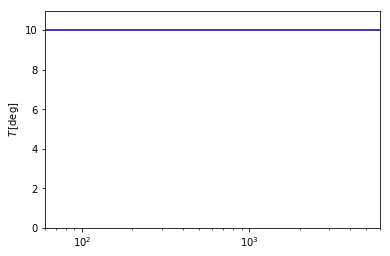

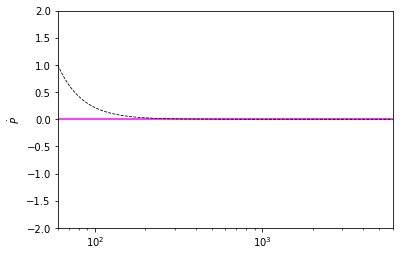

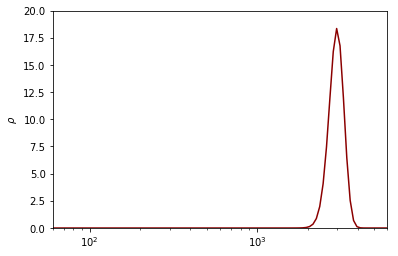

Finishing iteration at time t = 0.00012562099999995774/t_viscous with timestep 1e-09/t_viscous
PSI: 1.0907346979898211


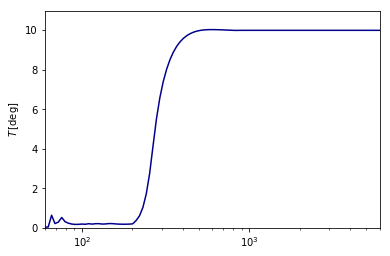

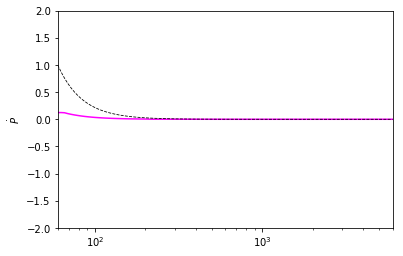

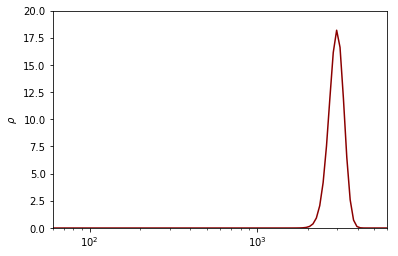

KeyboardInterrupt: 

<Figure size 432x288 with 0 Axes>

In [23]:
a = [1,2,3]
b = [10,20,30]
c = [100,200,300]
t = np.array(zip(a,b,c))
tx = t[:,0]
ty = t[:,1]
tz = t[:,2]
print t[2:,0] == t[:,0][2:]
print t,tx,ty,tz, '\n'
print tx**2.0 + ty**2.0 + tz**2.0
evolve()